In [1]:
!ls -lrt /scratch/tanhuanp/n_track_ML/output/shap/

total 8
drwxrws--- 3 hajaalin tanhuanp 4096 Aug 24 15:23 shap_best_adam_all_20230824
drwxrws--- 3 hajaalin tanhuanp 4096 Aug 24 16:23 shap_best_adam_all_20230824b


In [2]:
!ls -lrt /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b

total 4
drwxrws--- 22 hajaalin tanhuanp 4096 Aug 24 16:23 202308241620


In [3]:
import numpy as np
from pathlib import Path
import os 

# stored SHAP values from 21 repetitions
output_shap = Path('/scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b/202308241620')
repetitions = os.listdir(output_shap)
repetition0 = repetitions[0]
print(repetitions)

['18297715', '18297721', '18297719', '18297706', '18297709', '18297707', '18297724', '18297710', '18297722', '18297708', '18297723', '18297713', '18297711', '18297716', '18297720', '18297712', '18297717', '18297718', '18297714', '18297705']


In [4]:
# each subdirectory contains lists with 4 cross-validation runs
os.listdir(output_shap / repetition0)

['features.npy',
 'list_accuracy.npy',
 'list_idx_train.npy',
 'list_shap_grad.npy',
 'list_idx_test.npy',
 'list_X_test.npy',
 'list_shap_deep.npy']

In [5]:
def load_shap_values(output_shap):
    list_idx_train = np.load(output_shap / 'list_idx_train.npy', allow_pickle=True)
    list_idx_test = np.load(output_shap / 'list_idx_test.npy', allow_pickle=True)
    list_X_test = np.load(output_shap / 'list_X_test.npy', allow_pickle=True)
    list_shap_deep = np.load(output_shap / 'list_shap_deep.npy', allow_pickle=True)
    list_shap_grad = np.load(output_shap / 'list_shap_grad.npy', allow_pickle=True)
    list_acc = np.load(output_shap / 'list_accuracy.npy', allow_pickle=True)
    features = np.load(output_shap / 'features.npy', allow_pickle=True)
    
    return list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features

In [6]:
list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_accuracy, features =\
load_shap_values(output_shap / repetition0)

print(list_accuracy.mean())
print(list_idx_test.shape)
print(list_idx_test[0].shape)
#print(list_idx_test[0])
print(list_shap_deep.shape)
print(list_shap_deep[0].shape)
#print(list_shap_deep[0][0])


0.5848078386605784
(4,)
(72,)
(4,)
(72, 28, 5)


In [7]:
# combine all repetitions
lists_idx_test = []
lists_X_test = []
lists_shap_deep = []
lists_shap_grad = []
lists_acc = []
for r in os.listdir(output_shap):
    output = output_shap / r
    
    list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features =\
    load_shap_values(output)

    lists_idx_test.extend(list_idx_test)
    lists_X_test.extend(list_X_test)
    lists_shap_deep.extend(list_shap_deep)
    lists_shap_grad.extend(list_shap_grad)
    lists_acc.append(list_acc)
    
    #print(r)
    #print(np.mean(list_acc))
    #print(list_acc.shape)
    
list_idx_test = np.concatenate(lists_idx_test)
list_X_test = np.concatenate(lists_X_test)
list_shap_deep = np.concatenate(lists_shap_deep)
list_shap_grad = np.concatenate(lists_shap_grad)

list_acc = np.concatenate(lists_acc)
print(list_acc.shape)
print(np.mean(list_acc))


(80,)
0.5758040744596326


In [8]:
print(list_idx_test.shape)
print(list_X_test.shape)
print(list_shap_deep.shape)
print(list_shap_grad.shape)


(5780,)
(5780, 28, 5)
(5780, 28, 5)
(5780, 28, 5)


In [9]:
list_idx_test

array([  4,   5,   8, ..., 276, 281, 283])

In [10]:
unique, counts = np.unique(list_idx_test, return_counts=True)
print(len(unique))
print(min(unique))
counts

289
0


array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [11]:
list_shap_deep[:,0,0]

array([ 0.00616787, -0.06967973,  0.00152207, ...,  0.00165931,
        0.00199   ,  0.00203368])

In [12]:
# pick repetitions of a single instance (time series)
idx_1 = list_idx_test==1
shap_1 = list_shap_deep[idx_1] 
print(shap_1.shape)

# average over repetitions and timepoint (leaves features)
np.mean(shap_1, axis=(0,1))

(20, 28, 5)


array([ 0.0020725 ,  0.00132961,  0.00145279, -0.00157931, -0.00116448])

In [13]:
X_test_f = []
shap_deep_f = []
shap_grad_f = []
# loop over instances
for i in range(len(unique)):
    #print(i)
    idx_i = list_idx_test==i
    X_test_i = list_X_test[idx_i]
    shap_deep_i = list_shap_deep[idx_i]
    shap_grad_i = list_shap_grad[idx_i]
    # average over repetitions and time steps
    X_test_f.append(np.mean(X_test_i, axis=(0,1)))
    shap_deep_f.append(np.mean(shap_deep_i, axis=(0,1)))
    shap_grad_f.append(np.mean(shap_grad_i, axis=(0,1)))
    
X_test_f = np.array(X_test_f)
shap_deep_f = np.array(shap_deep_f)
shap_grad_f = np.array(shap_grad_f)

#X_test_f = np.concatenate(X_test_f, axis=0)
#shap_deep_f = np.concatenate(shap_deep_f, axis=0)
#shap_grad_f = np.concatenate(shap_grad_f, axis=0)

print(X_test_f.shape)
print(shap_deep_f.shape)
print(shap_grad_f.shape)


(289, 5)
(289, 5)
(289, 5)


In [14]:
X_test_f[:5]

array([[ 3.24527528, -0.39807546,  0.37472466, -1.30107697,  0.299444  ],
       [ 2.36515447, -0.39807546,  0.37472466,  0.5799637 ,  0.03282607],
       [ 1.01497432,  1.06918125,  0.62706687,  2.81467984,  0.19662749],
       [ 0.61239331,  1.06918125,  0.62706687,  2.5562934 , -0.16044559],
       [ 0.03809397, -0.57144043, -0.70319132, -0.93788191, -0.10490903]])

In [15]:
shap_deep_f[:5]

array([[ 0.00485738,  0.00049771, -0.00165593, -0.00356347,  0.000832  ],
       [ 0.0020725 ,  0.00132961,  0.00145279, -0.00157931, -0.00116448],
       [-0.00463206,  0.00615483, -0.00075919,  0.00618138, -0.00070133],
       [-0.00215314,  0.00237561, -0.00117219,  0.00895801, -0.00069911],
       [ 0.00306139, -0.00630908,  0.00014971, -0.00050228, -0.00020545]])

In [16]:
!pip install shap==0.41.0

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip list |grep shap

shap                          0.41.0


In [19]:
import pandas as pd
import shap

#from load_data_tsc import fsets

# feature sets
# 'file' is included because it is needed to create groups
fsets = {}
fs = ['file', 'serum']
fsets['D'] =             fs + ['D']
fsets['D_Dist'] =        fs + ['D', 'Dist']
fsets['D_A_P'] =         fs + ['D', 'A', 'P']
fsets['D_t'] =           fs + ['D', 't']
fsets['D_t_dt'] =        fs + ['D', 'dt']
fsets['D_Dist_t_dt_A'] = fs + ['D', 'Dist', 't','dt', 'A']
fsets['all'] =           fs + ['D', 'A', 'P', 'Dist', 'dt']

features = fsets['all'][2:]
print(features)

['D', 'A', 'P', 'Dist', 'dt']


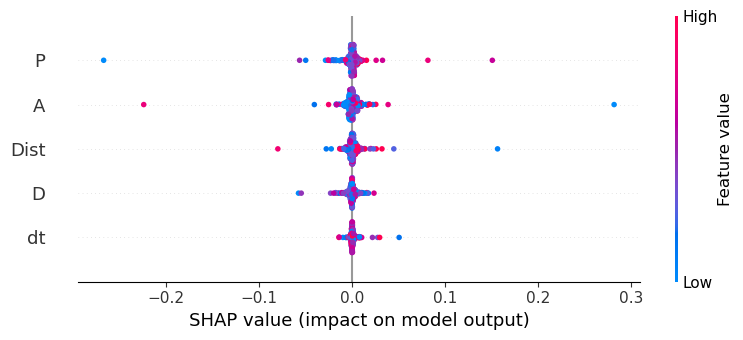

In [20]:
import matplotlib.pyplot as plt 

X_test_f = pd.DataFrame(X_test_f, columns=features)

shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer')


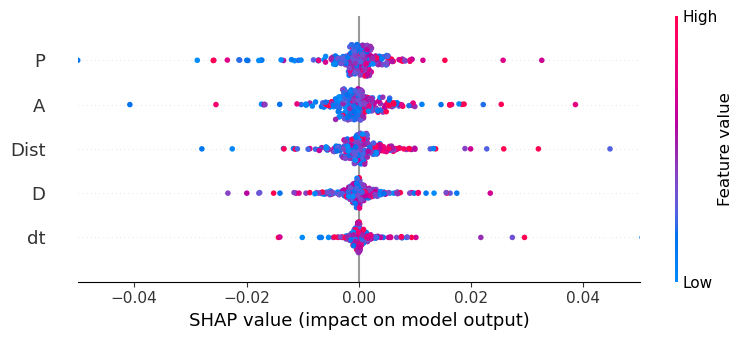

In [21]:
shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer, xlim', show=False)
ax = plt.gca()

# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.05, 0.05) 
plt.show()


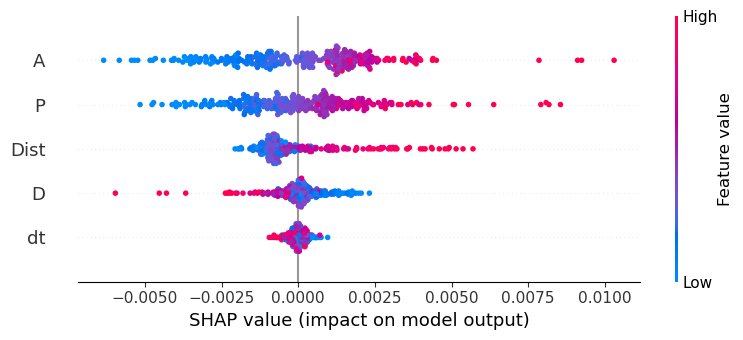

In [22]:
shap.summary_plot(shap_grad_f, features=X_test_f, title='GradientExplainer')